# Notebook para usarmos no Desafio 2!


Podemos começar a trabalhar de vez daqui para baixo. Segue a definição dos datasets:

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived. **bold text**

In [1]:
#! pip install plotly_express
#! pip install pandas-profiling
#! pip install pyjanitor

In [2]:
# Importando as bibliotecas

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import plotly_express as px

import pandas_profiling as prf

from scipy import stats

import scipy

import seaborn as sns

from sklearn import preprocessing

%matplotlib inline

In [3]:
# Lendo os csv

train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#answer = pd.read_csv('gender_submission.csv')

In [4]:
# Como o próprio Kaggle diz, no arquivo train, temos todas as respostas, então acho justo entendermos ele primeiro, e depois passamos para o test.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


![alt text](https://drive.google.com/uc?id=1nPcU8QyTPwPMp72gKnnQPMfjkHR37ZBe)


In [5]:
# Age e Cain possuem valores nulos, seria legal entendermos a razão disso. Aproveitei e deixei o dicionário para nós

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



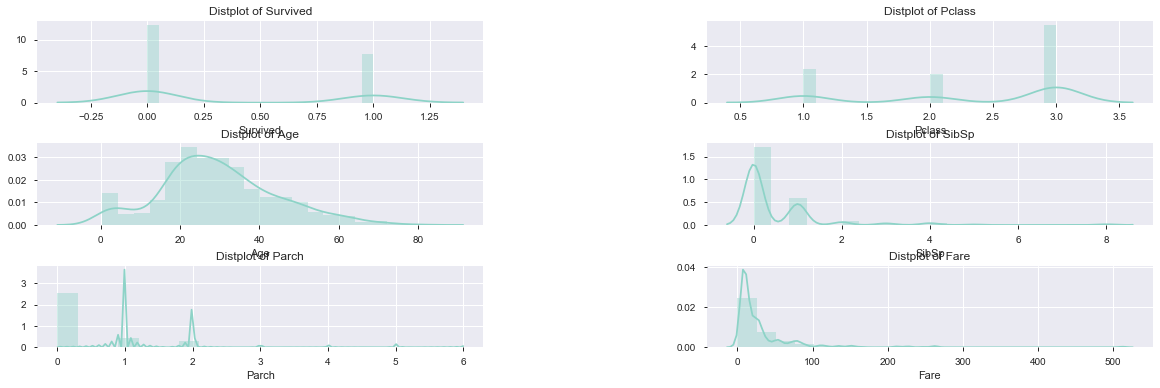

In [7]:
plt.figure(1 , figsize = (20 , 6))
n = 0 
for x in ['Survived' , 'Pclass' ,'Age','SibSp','Parch','Fare']:
    n += 1
    plt.subplot(3 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(train[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

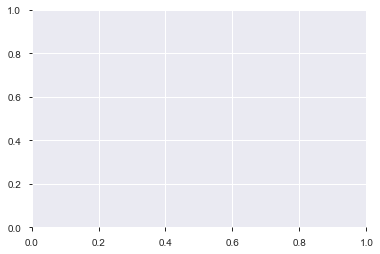

In [8]:
plt.subplot()

# Novo código Inserido Tico 

In [55]:
#! pip install pyjanitor
#! pip install plotly_express
! pip install imblearn

In [56]:
import janitor
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import math 
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
##Alterando alguns valores do Matplot
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [57]:
df = pd.read_csv(r'train.csv')
pd.set_option('display.max_columns', None)
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
##Retira os dois passageiros que nao embarcaram 
df = df.loc[df['Embarked'].isnull()==False]

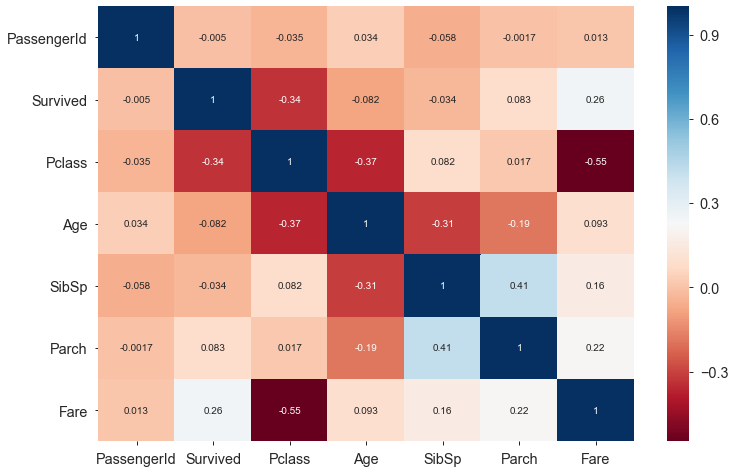

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap=plt.cm.RdBu, annot=True)

In [60]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [61]:
fig = px.histogram(df.sort_values(by=['Pclass']), x = "Sex",color="Sex", facet_col="Pclass", facet_row = "Survived")
fig.show()

# Explorando a Variável Age

* Iremos usar a media das idades com Base no Sexo das Pessoa e a Classe para determinar as idades que estam igual a ZERO
* Iremos determinar agrupamentos de idades 
  * IsAdulto a partir de 18 anos
  * Agrupamento de Idades a partir do Describe

**GAP: gerar uma regresao linear para determinar as idades ao inves da media e verificar se melhora nosso algoritimo**

In [62]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [63]:
fig = px.box(df.sort_values(by=['Pclass']), x = "Sex",color="Sex", y="Age", facet_col="Pclass")
fig.show()

In [64]:
## Ajusta as idades NaN
df['FE_Age'] = np.where(df['Age'].isnull(), 0,df['Age'])

##Determina as idades com valores ZERO
## FE_AGE ESTA UTILIZANDO A MEDIANA NO CASO DAS IDADES NULAS 
##Class 1
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="female")&(df['Pclass']==1), 35, df['FE_Age'])
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="male")&(df['Pclass']==1), 40 , df['FE_Age'])

##Class 2
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="female")&(df['Pclass']==2),28 , df['FE_Age'])
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="male")&(df['Pclass']==2),30 , df['FE_Age'])

##Class 3
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="female")&(df['Pclass']==3),21.5 , df['FE_Age'])
df['FE_Age'] = np.where((df['FE_Age']==0)&(df['Sex']=="male")&(df['Pclass']==3),25 , df['FE_Age'])

## Cria agrupamento se o individui é adulto
df['FE_IsAdulto'] = np.where(df['Age'] > 18, 1,0)


In [65]:
df['FE_Age'].describe()

count    889.000000
mean      29.065433
std       13.270162
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: FE_Age, dtype: float64

In [66]:
##Group_Age 1
df.loc [df['FE_Age'] <= 20 ,'FE_GroupAge'] =0
##Group_Age 2
df.loc [(df['FE_Age'] > 20) & (df['FE_Age'] <=28) , 'FE_GroupAge']=1
##Group_Age 3
df.loc [(df['FE_Age'] > 28) & (df['FE_Age'] <=38) , 'FE_GroupAge']=2
##Group_Age 4
df.loc [df['FE_Age'] > 38 ,'FE_GroupAge'] =3


In [67]:
df['FE_GroupAge'].value_counts()

1.0    321
3.0    197
2.0    192
0.0    179
Name: FE_GroupAge, dtype: int64

In [68]:
fig = px.histogram(df, x = "FE_GroupAge",color="FE_GroupAge", facet_row = "Survived")
fig.show()

# Explorando a variavel Fare 

*   Determinar o valor para Fare **ZERADO**
*   Separacao em agrupamementos tomando como base do discribe da variavel
    * menor a 25%; (1)
    * entre 25% e 50% (2) 
    * maior a 75%. (3)


**GAP: gerar uma regresao linear para determinar os precos das passagens ao inves da media e verificar se melhora nosso algoritimo**

In [69]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [70]:
df.loc[df['Fare']==0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FE_Age,FE_IsAdulto,FE_GroupAge
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0,15.000000,15.000000,15.000000
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0,33.733333,0.466667,2.133333
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0,7.459095,0.516398,0.833809
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0,19.000000,0.000000,0.000000
25%,290.500000,0.000000,1.000000,30.500000,0.0,0.0,0.0,30.000000,0.000000,2.000000
50%,482.000000,0.000000,2.000000,38.000000,0.0,0.0,0.0,30.000000,0.000000,2.000000
75%,704.000000,0.000000,2.500000,39.500000,0.0,0.0,0.0,39.500000,1.000000,3.000000
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0,49.000000,1.000000,3.000000


In [71]:
fig = px.histogram(df.loc[df['Fare']==0],  x="Sex", facet_col="Pclass",title="Sobreviventes Nao pagantes por Classe")
fig.show()

In [72]:
df_fare = df.loc[df['Fare']>0]
fig = px.box(df_fare.sort_values(by=['Pclass']),  y="Fare", facet_col="Pclass",title="Preco por Classe")
fig.show()

In [73]:
#Atribui valor a Fare = 0: Base Media de pagamento por classe.

##Class 1
df['Fare'] = np.where((df['Fare']==0)&(df['Pclass']==1), 61.37, df['Fare'])
##Class 2
df['Fare'] = np.where((df['Fare']==0)&(df['Pclass']==2),15.02 , df['Fare'])
##Class 3
df['Fare'] = np.where((df['Fare']==0)&(df['Pclass']==3),8.05 , df['Fare'])

In [74]:
df['Fare'].describe()

count    889.000000
mean      32.579437
std       49.614582
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [75]:
##Agrupamento do Fare
df.loc [df['Fare'] <= 7.91 ,'FE_Fare'] =0
df.loc [(df['Fare'] > 7.91) & (df['Fare'] <=14.49) , 'FE_Fare']=1
df.loc [(df['Fare'] > 14.49) & (df['Fare'] <=31.27) , 'FE_Fare']=2
df.loc [df['Fare'] > 31.27 ,'FE_Fare'] =3

# Explorando a variável Cabin

* Cria agrupamentos tomando como base a primeira posição da informação


In [76]:
df['FE_AreaCabin'] = df["Cabin"].str.slice(0,1)
df['FE_AreaCabin'] = np.where(df['FE_AreaCabin'].isnull()==True, "0", df['FE_AreaCabin'])

In [77]:
df['FE_AreaCabin'].value_counts()

0    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: FE_AreaCabin, dtype: int64

# Explorando a variável SiSp e Parch

* Determina se é um viajante sozinho ou não (IsAlone)

In [78]:
df['IsAlone'] = np.where((df['Parch']==0)&(df['SibSp']==0),True , False)

In [79]:
df['IsAlone'].value_counts()

True     535
False    354
Name: IsAlone, dtype: int64

In [80]:
fig = px.histogram(df.sort_values(by=['Pclass']),  x="IsAlone",color="IsAlone", facet_col="Pclass", facet_row="Survived" , title="Gráfico IsAlone")
fig.show()

# Criando os Dummy´s

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FE_Age,FE_IsAdulto,FE_GroupAge,FE_Fare,FE_AreaCabin,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,1.0,0.0,0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,2.0,3.0,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1,1.0,1.0,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,2.0,3.0,C,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,1,2.0,1.0,0,True


In [82]:
df_modelo = pd.concat([df, pd.get_dummies(df['Sex'].astype(object), prefix='Sex', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['Embarked'].astype(object), prefix='Embarked', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['FE_GroupAge'].astype(object), prefix='FE_GroupAge', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['FE_Fare'].astype(object), prefix='FE_Fare', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['Pclass'].astype(object), prefix='Pclass', drop_first=True)], axis=1)
df_modelo = pd.concat([df_modelo, pd.get_dummies(df['IsAlone'].astype(object), prefix='IsAlone', drop_first=True)], axis=1)

# Ajustando o modelo

* retirando columnas que viraram dummy´s e também desnecessárias

In [83]:
df_modelo = df_modelo.drop(columns = ['PassengerId','Name','Sex','Ticket', 'Fare', 'Cabin', 'Embarked', 'FE_AreaCabin', 'FE_GroupAge', 'FE_Fare', "Pclass",'IsAlone'],axis = 1)
df_modelo.head()

,Survived,Age,SibSp,Parch,FE_Age,FE_IsAdulto,Sex_male,Embarked_Q,Embarked_S,FE_GroupAge_1.0,FE_GroupAge_2.0,FE_GroupAge_3.0,FE_Fare_1.0,FE_Fare_2.0,FE_Fare_3.0,Pclass_2,Pclass_3,IsAlone_True
0,0,22.0,1,0,22.0,1,1,0,1,1,0,0,0,0,0,0,1,0
1,1,38.0,1,0,38.0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,26.0,0,0,26.0,1,0,0,1,1,0,0,1,0,0,0,1,1
3,1,35.0,1,0,35.0,1,0,0,1,0,1,0,0,0,1,0,0,0
4,0,35.0,0,0,35.0,1,1,0,1,0,1,0,1,0,0,0,1,1


In [84]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 18 columns):
Survived           889 non-null int64
Age                712 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
FE_Age             889 non-null float64
FE_IsAdulto        889 non-null int32
Sex_male           889 non-null uint8
Embarked_Q         889 non-null uint8
Embarked_S         889 non-null uint8
FE_GroupAge_1.0    889 non-null uint8
FE_GroupAge_2.0    889 non-null uint8
FE_GroupAge_3.0    889 non-null uint8
FE_Fare_1.0        889 non-null uint8
FE_Fare_2.0        889 non-null uint8
FE_Fare_3.0        889 non-null uint8
Pclass_2           889 non-null uint8
Pclass_3           889 non-null uint8
IsAlone_True       889 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(12)
memory usage: 55.6 KB


# Realizada o treino do Modelo através do Metodo de Regressão Logistica

# Realiza a tecnica de Balanceamento (OverSampling)

In [85]:
count_classes = pd.value_counts(y_train, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de Sobreviventes")
plt.xlabel("Sobreviventes")
plt.ylabel("Frequency")

NameError: name 'y_train' is not defined

In [101]:
def CMatrix(CM,labels =['Survived','Not_Survived']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

In [102]:
def regressao_logistica(X, y, oversampling):
  Y = le.fit_transform(y)
  Y = np.ravel(Y)
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=123,stratify=Y)
  
  X_train_res = X_train
  y_train_res = y_train
  
  if oversampling == 1:
    sm = SMOTE(random_state=1234)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  
    
  logistic_regression= LogisticRegression(solver = 'sag', max_iter = 5000)
  log = logistic_regression.fit(X_train_res,y_train_res)
  
  y_pred_test_log = logistic_regression.predict(X_test)
  acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=y_test)
  precisao_log = precision_score(y_pred=y_pred_test_log,y_true=y_test)
  recall_log = recall_score(y_pred=y_pred_test_log,y_true=y_test)
  %precision
  CM= confusion_matrix(y_pred=y_pred_test_log,y_true=y_test)
  print("Precisão:", precisao_log, "Acuracia:", acuracia_log, "Recall:", recall_log)
  df = CMatrix(CM) 
  print(df)
  return df , acuracia_log, precisao_log, recall_log, logistic_regression

In [103]:
df_modelo1 = df_modelo.drop(columns=['Age', "FE_Age"], axis=1)
df_modelo1.head()
X1 = df_modelo1.iloc[:,1:]
y1 = df_modelo1.iloc[:,0]

In [104]:
RM1_balanceado = regressao_logistica(X1, y1, 1)

NameError: name 'le' is not defined

In [0]:
RM1_nao_balanceado = regressao_logistica(X1, y1, 0)

In [0]:
df_modelo2 = df_modelo.drop(columns=['Age', 'FE_GroupAge_1.0','FE_GroupAge_2.0','FE_GroupAge_3.0' ], axis=1)
df_modelo2.head()
X2 = df_modelo2.iloc[:,1:]
y2 = df_modelo2.iloc[:,0]

In [0]:
RM2_balanceado = regressao_logistica(X2, y2, 1)

In [0]:
RM2_nao_balanceado = regressao_logistica(X2, y2, 0)

In [0]:
df_modelo3 = df_modelo.iloc[:,0:8]
df_modelo3.drop(columns='FE_GroupAge', axis=1,inplace=True)
df_modelo3.info()

X3 = df_modelo3.iloc[:,1:]

In [0]:
RM3_balanceado = regressao_logistica(X3, y, 1)

In [0]:
RM3_nao_balanceado = regressao_logistica(X3, y, 0)

In [0]:
df_modelo4 = df.drop(columns = ['PassengerId',"FE_Age",'Name','Sex','Ticket', 'Fare', 'Cabin', 'Embarked', 'FE_AreaCabin',"Embarked_C","Embarked_Q", "Embarked_S","FE_AreaCabin_0","FE_AreaCabin_A","FE_AreaCabin_B","FE_AreaCabin_C","FE_AreaCabin_D","FE_AreaCabin_E","FE_AreaCabin_F","FE_AreaCabin_G","FE_AreaCabin_T"])
df_modelo4.head()

In [0]:
regressao_idade = smf.ols ('Age~Pclass+SibSp+Parch+FE_IsAdulto+FE_GroupAge+FE_Fare+IsAlone+Sex_male', data = df_modelo4).fit()

In [0]:
df_modelo3 = df_modelo.iloc[:,0:8]
df_modelo3.drop(columns='FE_GroupAge', axis=1,inplace=True)
df_modelo3.info()

X3 = df_modelo3.iloc[:,1:]

# EXPORTAÇÃO PARA ARQUIVO DE SUBMISSÃO

In [0]:
# Define função para gerar o arquivo para exportar
def ExportaArquivo(PassengerId , Predito):
    np.ravel(PassengerId)
    np.ravel(Predito)
    PassengerId_Series = pd.Series(PassengerId)
    Predito_Series = pd.Series(Predito)
    result = pd.DataFrame({ 'Passenger Id' : PassengerId_Series, 'Survived' : Predito_Series })
    result.to_csv(index=False)